# Capstone Project 2 - Yes Bank Stock Closing Price Prediction

## Problem Statement

### Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

## Data Description
#We have Yes Bank monthly stock price dataset.
### Attribute Information:

1) Date: Date of the month of stock price.

2) Open: The opening price of the stock on a particular day

3) High: It's the highest price at which a stock traded during a period

4) Low: It's the lowest price at which stock traded during a period

5) Close: The closing price of a stock at the end of a Trading Day

# The Structure of this notebook
## Project Work flow
1) Importing Libraries

2) Loading the Dataset

3) Data Processing

4) Data Cleaning

5) EDA on features

6) Multicollinearity Test

7) Feature Engineering

8) Encoding technique

9) Fitting the regression models and HyperParameter Tuning

10) Comparison of Models

11) Conclusion

# Importing Libraries

In [1]:
# Importing Required Libraries
import numpy as np      # numerical computations
import pandas as pd     # data manipulations
import matplotlib.pyplot as plt  # Used for visualization
%matplotlib inline
import seaborn as sns         # Used for visualization
from datetime import datetime    # to convert to date
from numpy import math          # Used for maths operation
from scipy import stats             #used for statistical analysis
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Directory path
import os
os.chdir(r'C:\Users\Lenovo\Downloads\AlmaBetter Project\ML Project')

In [3]:
# Loading Dataset
data = pd.read_csv('data_YesBank_StockPrices.csv')
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [4]:
# Checking Top 5 rows of the dataset
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
# Checking last 5 rows of the dataset
data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [6]:
# Getting the shape of dataset: No of rows and column of the dataset
data.shape

(185, 5)

There are 185 observations in the dataset. And has 5 columns.

In [7]:
# checking column of dataset
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [8]:
# let's look at the statistical aspects of the dataframes
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [9]:
# details of the features  : the count of null values and the data type of our columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


We can observe that those dataset have 5 variables. But Date have values in object data type. So, we need to convert it into proper date format. and other columns that have in float types.

# Data Processing

In [10]:
# checking missing value
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In our dataset has no missing value

In [11]:
# checking duplicate values
len(data[data.duplicated()])

0

In [12]:
# importing datetime and converting 'Date' into datetime - YYYY-MM-DD
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [13]:
data.head(1)

,Date,Open,High,Low,Close
0,2005-07-01,13.0,14.0,11.25,12.46


In [14]:
# again check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


 now clearly show that date feature are in datetime format

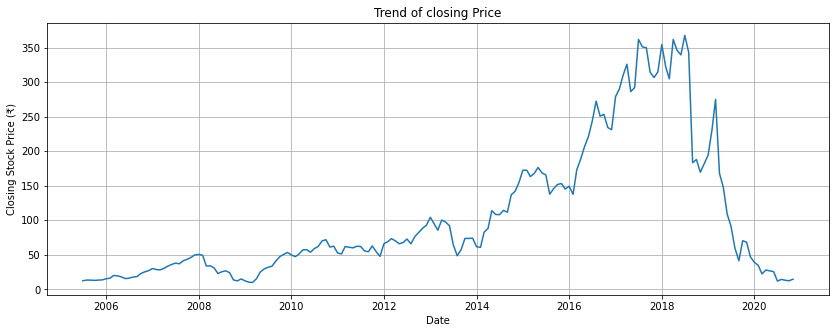

In [15]:
# Plotting the trend of dependent Variable
plt.figure(figsize=(14,5))
plt.grid(True)
plt.plot(data['Date'],data['Close'] )
plt.title('Trend of closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price (₹)')
plt.show()

The above plot of Closing prices of different dates gives a very fluctuation in prices regarding different time-duration. After 2018 there is a sudden fall in the stock closing price.

# EDA-Exploratory Data Analysis & Data Visualization

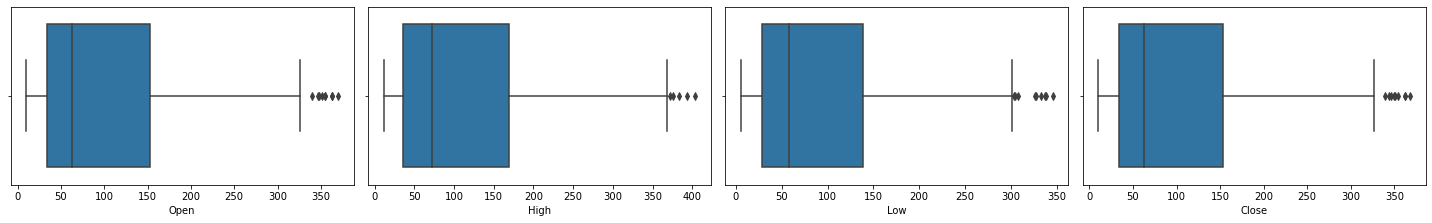

In [16]:
# plotting boxplot to see the outliers Outlier and Visualization the overall data
n = 1
plt.figure(figsize=(20,15))
for column in data.describe().columns:
    plt.subplot(5, 4, n)
    n = n+1
    sns.boxplot(data[column])
    plt.tight_layout()

### Univariate Analysis

In [17]:
#Storing all the numeric features in a variable list
numerical_col = ['Open','High','Low','Close']

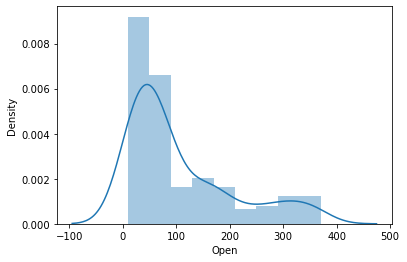

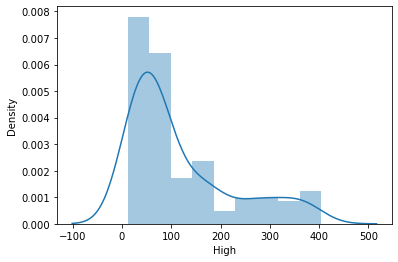

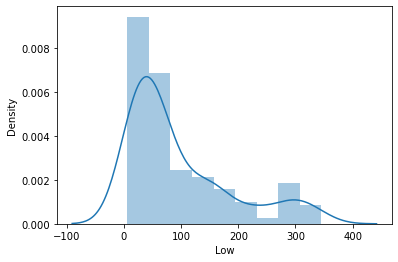

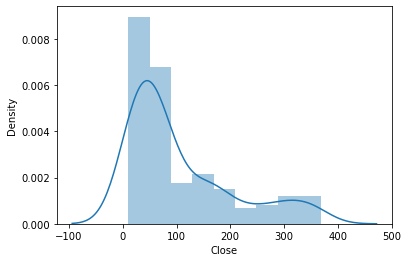

In [18]:
for col in numerical_col:
    plt.figure(figsize=(6,4))
    sns.distplot(x=data[col])
    plt.xlabel(col)
plt.show()

The above distribution of Stock Price is a positively right-skewed distribution. this is not a perfect normal distribution, so we have to apply some kind of transformation to see if it will look like a normal distribution or not. It can be corrected by applying Log Transformation then we'll have a look at how this data behave.

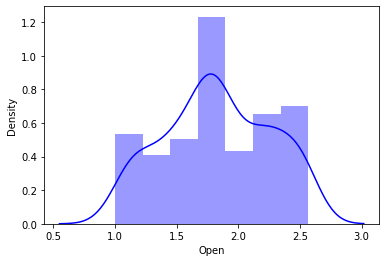

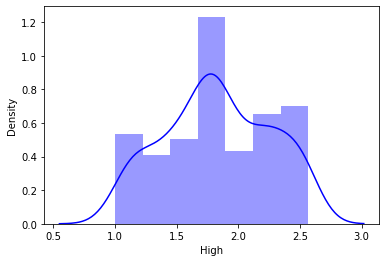

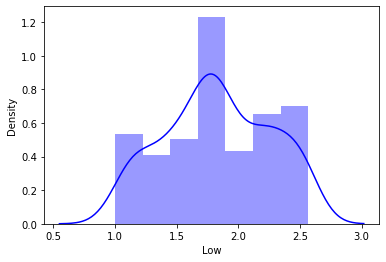

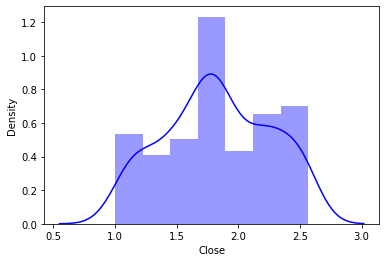

In [19]:
# Applying log for normal distrubution.

for col in numerical_col:
    plt.figure(figsize=(6,4))
    sns.distplot(np.log10(data['Close']),color='blue')
    plt.xlabel(col)
plt.show()

Now we can look at this distribution it is not a perfectly normal distribution but more or less its looking normal distribution.

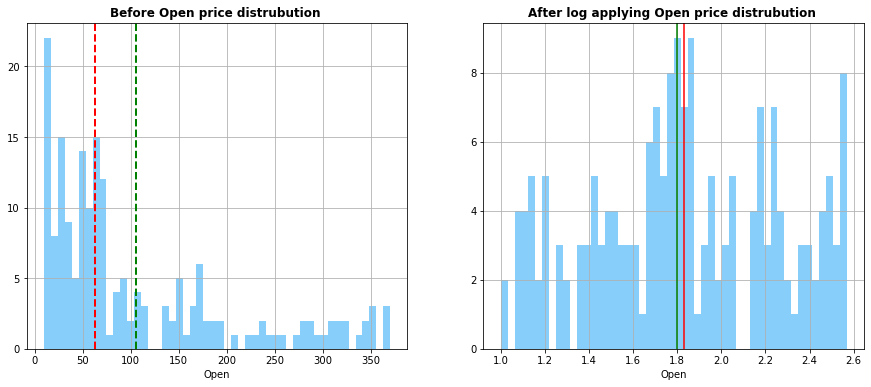

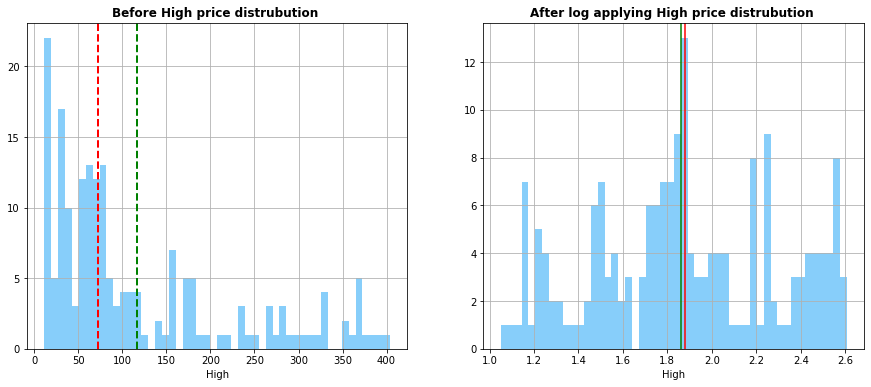

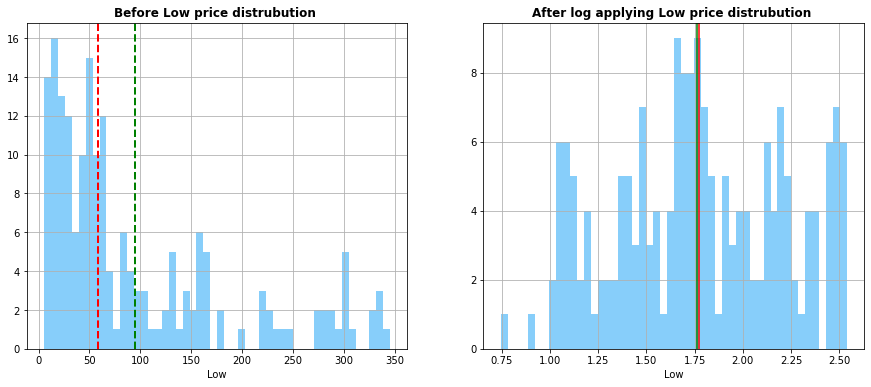

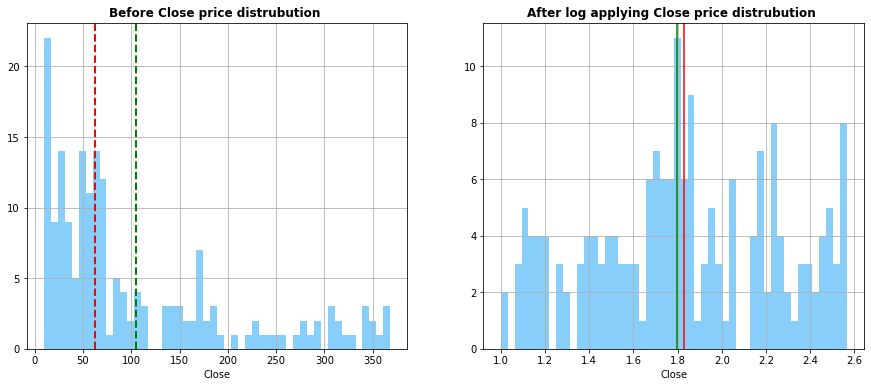

In [20]:
# tring to draw histogram for each variable with mean and median of each single variable (before and after log)
for col in numerical_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.grid()
    plt.hist(x=data[col] ,bins = 50, color ='lightskyblue')
    plt.title("Before {} price distrubution ".format(col),fontweight = 'bold')
    plt.xlabel(col)
    plt.axvline(data[col].mean(),color='green', linestyle='dashed',linewidth=2)
    plt.axvline(data[col].median(),color='red', linestyle='dashed',linewidth=2)

    plt.subplot(1, 2, 2)
    plt.grid()
    log_df = np.log10(data[col])
    plt.hist(log_df, bins = 50, color ='lightskyblue')
    plt.title("After log applying {} price distrubution ".format(col),fontweight = 'bold')
    plt.xlabel(col)
    plt.axvline(log_df.mean(),color = 'r')
    plt.axvline(log_df.median(),color = 'green')
    

From the above plots, we can see the before applying log of our all features are positively skewed and 
After log transformation, now it looks approximately normally distributed to me and if you'll observe statistically: the mean and median are always close to each other.

### Bivariate Analysis

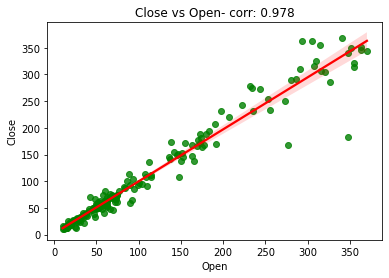

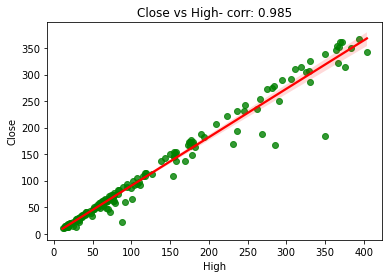

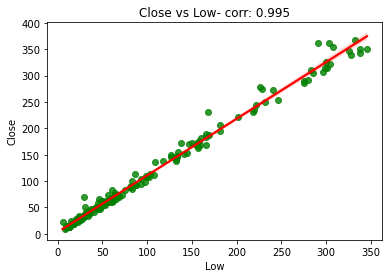

In [21]:
# the relationship between dependent & independent variables (two numerial feature)
    
for col in numerical_col[:-1]:
    feature = data[col]
    label = data['Close']
    fig,ax=plt.subplots(figsize=(6,4))
    sns.regplot(x=data[col],y=data['Close'],scatter_kws={"color": 'green'}, line_kws={"color": "red"})
    correlation = round(feature.corr(label),3)
    ax.set_title('Close vs ' + col + '- corr: ' + str(correlation))

From the above plots we can conclude that the columns
'Open', 'High', 'Low' these features are linear relation and high correlation between each independent and dependent variables.
 that means there is a strong correlation between all the independent variables.

### Checking correletion betweeen variables using Correlation heatmap.

<AxesSubplot:>

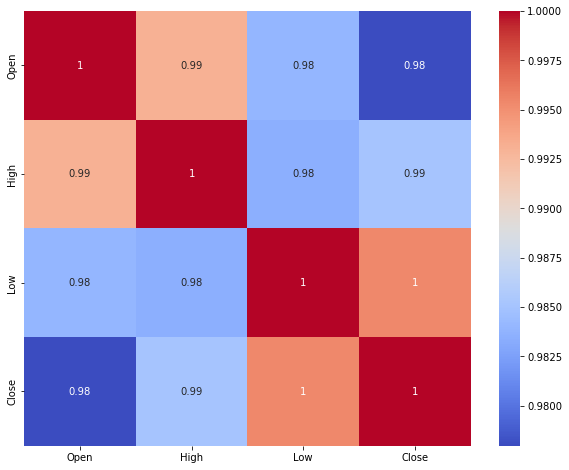

In [22]:
#Now, let see more better correlation values between all the features in our dataset by using heatmap.
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Above heatmap we can see that Every feature is extremely corelated with each other.
its means there is a high multicollinearity between each independent column.

# Multicollinearity Test

In [23]:
# By seeing the heatmap we conclude that there is a high multicollinearity between each independent column.
# here we importing A variance inflation factor (VIF) which is used for measure the amount of multicollinearity
# Importing libraries for multicollinearity-
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
# defined the function for VIF

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [25]:
calculate_vif(data[[i for i in data.describe().columns if i not in ['Date']]])

,variables,VIF
0,Open,288.504853
1,High,323.952468
2,Low,424.612257
3,Close,428.401649


Here we can see that we have very high VIF score which means there is a high multicollinearity between these variables.

High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

In [26]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

# Feature Engineering

In [27]:
# Creating a new feature based on average of other features in the dataset
data['Average'] = (data['High'] + data['Low'])/2

# adding new features of name 'year'
data['Year'] = data['Date'].apply(lambda x: x.strftime('%Y'))

# adding new feature of name 'Month'
data['Month'] = data['Date'].apply(lambda x: x.strftime('%b'))

# set the date column as index
data.set_index('Date',inplace=True)

In [28]:
data.head()

,Open,High,Low,Close,Average,Year,Month
Date,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.625,2005,Jul
2005-08-01,12.58,14.88,12.55,13.42,13.715,2005,Aug
2005-09-01,13.48,14.87,12.27,13.30,13.570,2005,Sep
2005-10-01,13.20,14.47,12.40,12.99,13.435,2005,Oct
2005-11-01,13.35,13.88,12.88,13.41,13.380,2005,Nov


<AxesSubplot:>

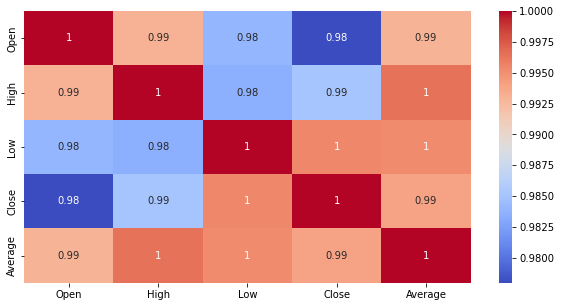

In [29]:
# Now again check correlation
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

There are very high correlation between independent variables which lead us to multicollinearity.

In [30]:
calculate_vif(data[[i for i in data.describe().columns if i not in ['Close','Month']]])

,variables,VIF
0,Open,175.185704
1,High,inf
2,Low,inf
3,Average,inf


#Again We have very high VIF in our dataset so,we have to drop one them.

In [31]:
calculate_vif(data[[i for i in data.describe().columns if i not in ['Close','Average']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


<AxesSubplot:>

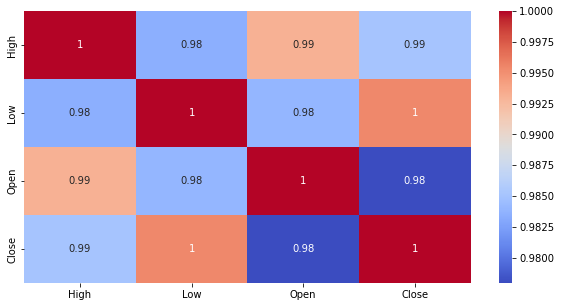

In [32]:
# we have to plot heatmap again between left independet variables and dependent variable.
# So, we can decide which variable we can drop.
plt.figure(figsize = (10,5))
sns.heatmap(data[['High','Low','Open','Close']].corr(),annot=True,cmap='coolwarm')

In [33]:
calculate_vif(data[[i for i in data.describe().columns if i not in ['Close','Average','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


Now we should have a VIF of less than 5 which is good. but if Our final dropping variable will be a High feature because it has less correlation with the dependent variable in comparison with the dependent variable(Close) but We have dropped already 3 features from our dataset it can affect our model efficiency.

So, we preferred to drop the features and move forward with this Variable.

# Encoding technique 

In [34]:
# months and year features convert into dummie variable
data = pd.get_dummies(data,columns = ['Year','Month'])

In [35]:
data.head()

,Open,High,Low,Close,Average,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
Date,,,,,,,,,,,,,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.625,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2005-08-01,12.58,14.88,12.55,13.42,13.715,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005-09-01,13.48,14.87,12.27,13.30,13.570,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2005-10-01,13.20,14.47,12.40,12.99,13.435,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2005-11-01,13.35,13.88,12.88,13.41,13.380,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
data.shape

(185, 33)

# Data Pre-processing

In [37]:
new_data = data.copy()

In [38]:
new_data.head(3)

,Open,High,Low,Close,Average,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
Date,,,,,,,,,,,,,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.625,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2005-08-01,12.58,14.88,12.55,13.42,13.715,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005-09-01,13.48,14.87,12.27,13.30,13.570,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
new_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Average', 'Year_2005', 'Year_2006',
       'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Month_Apr',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul',
       'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep'],
      dtype='object')

In [40]:
# selecting the dependent and independent variable

# independent variable
X = new_data.drop(columns=['Open', 'High','Close','Average','Month_Apr',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul',
       'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep'], axis=1)

# dependent variable
y = new_data['Close']

# Machine Learning Model

In [41]:
# machine learning libraries

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from scipy.stats import zscore


In [42]:
total_features  = ['Low','Year_2005','Year_2006','Year_2007','Year_2008','Year_2009','Year_2010',
                   'Year_2011','Year_2012','Year_2013','Year_2014','Year_2015','Year_2016','Year_2017','Year_2018','Year_2019','Year_2020']

In [43]:
X = round(new_data[total_features].apply(zscore),3)

In [44]:
# independent variable
X = round(new_data.drop(columns=['Open', 'High','Close','Average','Month_Apr',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul',
       'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep'],).apply(zscore),3)

In [45]:
# dependent variable and apply log
y = np.log10(new_data['Close'])

In [46]:
# shape of dependent and independent feature
print(X.shape)
print(y.shape)

(185, 17)
(185,)


In [47]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state = 0)

In [48]:
print(X_train.shape)
print(X_test.shape)

(148, 17)
(37, 17)


In [49]:
print(y_train.shape)
print(y_test.shape)

(148,)
(37,)


In [50]:
# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LinearRegression

In [51]:
# Fitting the data to Linear Regression model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [52]:
#Checking efficiency of training model
LR_Regression_score = reg.score(X_train, y_train)
print('Regression score:', LR_Regression_score)
print('\n')
#getting regression coefficients 
print('Regression intercept:', reg.intercept_)
print('\n')
print('Regression coefficient; ', reg.coef_)


Regression score: 0.9457782003729944


Regression intercept: 1.799864714136271


Regression coefficient;  [ 0.29012394 -0.07021535 -0.07303138 -0.01301291 -0.04681399 -0.03850902
  0.01796364  0.01884737  0.0355901   0.04011582  0.04568439  0.0519569
  0.04459406  0.00080571  0.02349548  0.02876876 -0.06892507]


In [53]:
# Getting the y_train and y-test value
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)

In [54]:
# Evluation Matrix for Linear Regression (Train data)
MSE = mean_squared_error(y_train, y_train_pred)
MAE = mean_absolute_error(y_train, y_train_pred)
R2 = r2_score(y_train, y_train_pred)

print('Training Errors\nMSE:', MSE , '\nMAE:' , MAE , '\nR2:',R2)

Training Errors
MSE: 0.009521005177830721 
MAE: 0.06686891462184028 
R2: 0.9457782003729944


In [55]:
# Evluation Matrix for Linear Regression (Test data)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = math.sqrt(mean_squared_error(y_test, y_test_pred))
MAE = mean_absolute_error(y_test, y_test_pred)
R2 = r2_score(y_test, y_test_pred)

Adj_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

Mean_absolute_percentage_error = round(mean_absolute_percentage_error(y_test_pred, y_test),2)

print('Testing Error\nMSE:',MSE,'\nRMSE:',RMSE,'\nMAE:',MAE,'\nR2:',R2,'\nAdj R2:',Adj_R2,'\nMean abs % error:',
      Mean_absolute_percentage_error)

Testing Error
MSE: 0.009406723615747598 
RMSE: 0.09698826535075054 
MAE: 0.06477561608237992 
R2: 0.9495028677900178 
Adj R2: 0.9043212231810863 
Mean abs % error: 0.03


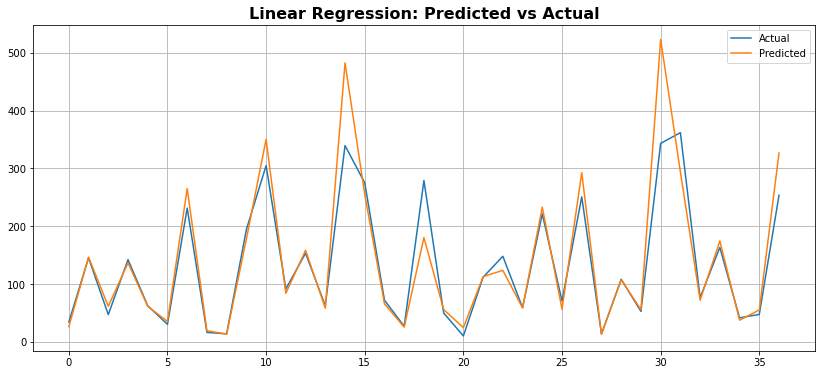

In [56]:
plt.figure(figsize=(14,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_test_pred))
plt.legend(['Actual','Predicted'])
plt.title('Linear Regression: Predicted vs Actual',fontweight = 'bold',fontsize = 16)
plt.grid()
plt.show()

In [57]:
# storing the test set metrics value in a dataframe for later comparison

dict1={'Model':'Linear regression',
       'MAE':round((MAE),4),
       'MSE':round((MSE),4),
       'RMSE':round((RMSE),4),
       'R2_score':round((R2),4),
       'Adj_R2':round((Adj_R2),4),
       'Training_Score':round((LR_Regression_score),4)
       }
test_data=pd.DataFrame(dict1,index=[1])

# LASSO REGRESSION

In [58]:
#fitting data on Lasso Regression
lasso  = Lasso(alpha=0.0001 , max_iter= 5000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=5000)

In [59]:
#checking thhe score of model
Lasso_Regression_score = lasso.score(X_train, y_train)
print(Lasso_Regression_score)

0.9457773593291265


In [60]:
# Getting the y_train and y-test value
y_lasso_train_pred=lasso.predict(X_train)
y_lasso_test_pred=lasso.predict(X_test)

In [61]:
# Evluation Matrix for Lasso Regression (Train data)
MSE = mean_squared_error(y_train, y_lasso_train_pred)
MAE = mean_absolute_error(y_train, y_lasso_train_pred)
R2 = r2_score(y_train, y_lasso_train_pred)

print('Training Errors\nMSE:', MSE , '\nMAE:' , MAE , '\nR2:',R2)

Training Errors
MSE: 0.009521152859816123 
MAE: 0.06686817533632712 
R2: 0.9457773593291265


In [62]:
# Evluation Matrix for lasso Regression ( test data)
print("MSE :",mean_squared_error(y_test, y_lasso_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_lasso_test_pred)))
print("MAE :",mean_absolute_error(y_test, y_lasso_test_pred))
print("R2 :",r2_score(y_test, y_lasso_test_pred))
Adjusted_R2 = 1-(1-r2_score((y_test), (y_lasso_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)
print('mean absolute percentage error:',round(mean_absolute_percentage_error(y_lasso_test_pred, y_test),2))

MSE : 0.009400674495098139
RMSE : 0.09695707552880367
MAE : 0.0647058884880742
R2 : 0.9495353406527984
Adjusted R2 :  0.9043827507105655
mean absolute percentage error: 0.03


# Cross Validation for Lasso Regression

#### Applying Cross Validation to train accurately because our dataset is too small, and to get the best α for Lasso we used Hyperparameter Tuning by GridSearchCV().

In [63]:
# Cross Validation 
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)#cv=5 means we div our data into 5 fold
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 0.0014]},
             scoring='neg_mean_squared_error')

In [64]:
print(" The Best fitted alpha value for lasso regression is :" ,lasso_regressor.best_params_)
print("\nBy Using ",lasso_regressor.best_params_, " Negative mean squared error : ", lasso_regressor.best_score_)

 The Best fitted alpha value for lasso regression is : {'alpha': 0.0014}

By Using  {'alpha': 0.0014}  Negative mean squared error :  -0.012639756628250376


In [65]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [66]:
# Now again Evaluation Matrics for lasso Regression after cross validation
MSE = mean_squared_error(y_test, y_pred_lasso)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred_lasso))
MAE = mean_absolute_error(y_test, y_pred_lasso)

R2 = r2_score(y_test, y_pred_lasso)

Adj_R2 = 1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

Mean_absolute_percentage_error = round(mean_absolute_percentage_error(y_pred_lasso, y_test),2)


print('Testing Error\nMSE:',MSE,'\nRMSE:',RMSE,'\nMAE:',MAE,'\nR2:',R2,'\nAdj R2:',Adj_R2,'\nMean abs % error:',
      Mean_absolute_percentage_error)

Testing Error
MSE: 0.009358869172944458 
RMSE: 0.09674124855998323 
MAE: 0.06400567826995943 
R2: 0.9497597597987316 
Adj R2: 0.9048079659344389 
Mean abs % error: 0.03


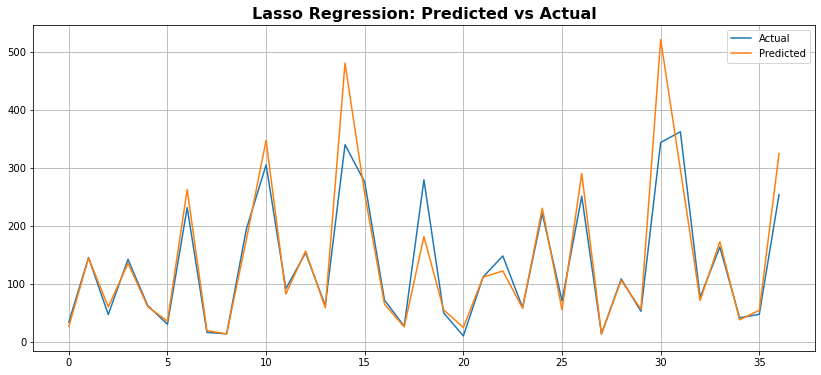

In [67]:
# plot
plt.figure(figsize=(14,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Actual','Predicted'])
plt.title('Lasso Regression: Predicted vs Actual',fontweight = 'bold',fontsize = 16)
plt.grid()
plt.show()

In [68]:
# storing the test set metrics value in a dataframe for later comparison

dict1={'Model':'Lasso regression',
       'MAE':round((MAE),4),
       'MSE':round((MSE),4),
       'RMSE':round((RMSE),4),
       'R2_score':round((R2),4),
       'Adj_R2':round((Adj_R2),4),
       'Training_Score':round((Lasso_Regression_score),4)
       }
test_data=test_data.append(dict1,ignore_index=True)

# RIDGE REGRESSION

In [69]:
#fitting data on ridge regression
ridge = Ridge(alpha= 0.1, max_iter = 5000)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, max_iter=5000)

In [70]:
#checking thhe score of model
Ridge_Regression_score = ridge.score(X_train,y_train)
print(Ridge_Regression_score)

0.9457769143533759


In [71]:
# Getting the y_train and y-test value
y_ridge_train_pred=ridge.predict(X_train)
y_ridge_test_pred=ridge.predict(X_test)

In [72]:
# Evluation Matrix for Lasso Regression (Train data)
MSE = mean_squared_error(y_train, y_ridge_train_pred)
MAE = mean_absolute_error(y_train, y_ridge_train_pred)
R2 = r2_score(y_train, y_ridge_train_pred)

print('Training Errors\nMSE:', MSE , '\nMAE:' , MAE , '\nR2:',R2)

Training Errors
MSE: 0.009521230994744436 
MAE: 0.06685347742346837 
R2: 0.9457769143533759


In [73]:
# Evluation Matrix for ridge Regression (test data)
print("MSE :",mean_squared_error(y_test, y_ridge_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_ridge_test_pred)))
print("MAE :",mean_absolute_error(y_test, y_ridge_test_pred))
print("R2 :",r2_score(y_test, y_ridge_test_pred))
Adjusted_R2 = 1-(1-r2_score((y_test), (y_ridge_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)
print('mean absolute percentage error:',round(mean_absolute_percentage_error(y_ridge_test_pred, y_test),2))

MSE : 0.009368858376383233
RMSE : 0.09679286325129158
MAE : 0.06468478696759115
R2 : 0.9497061358009057
Adjusted R2 :  0.904706362570137
mean absolute percentage error: 0.03


# Cross Validation for Ridge Regression

In [74]:
# Cross Validation 
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,0.0014]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)#cv=5 means we div our data into 5 fold
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 0.0014]},
             scoring='neg_mean_squared_error')

In [75]:
print(" The Best fitted alpha value for ridge regression is :" ,ridge_regressor.best_params_)
print("\nBy Using ",ridge_regressor.best_params_, " Negative mean squared error : ", ridge_regressor.best_score_)

 The Best fitted alpha value for ridge regression is : {'alpha': 5}

By Using  {'alpha': 5}  Negative mean squared error :  -0.012561937766356012


In [76]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [77]:
# Now again Evaluation Matrics for ridge Regression after cross validation
MSE = mean_squared_error(y_test, y_pred_ridge)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred_ridge))
MAE = mean_absolute_error(y_test, y_pred_ridge)
R2 = r2_score(y_test, y_pred_ridge)

Adj_R2 = 1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

Mean_absolute_percentage_error = round(mean_absolute_percentage_error(y_pred_ridge, y_test),2)


print('Testing Error\nMSE:',MSE,'\nRMSE:',RMSE,'\nMAE:',MAE,'\nR2:',R2,'\nAdj R2:',Adj_R2,'\nMean abs % error:',
      Mean_absolute_percentage_error)

Testing Error
MSE: 0.008846231170224867 
RMSE: 0.09405440537383067 
MAE: 0.06208312407832339 
R2: 0.9525117008630843 
Adj R2: 0.9100221700563703 
Mean abs % error: 0.03


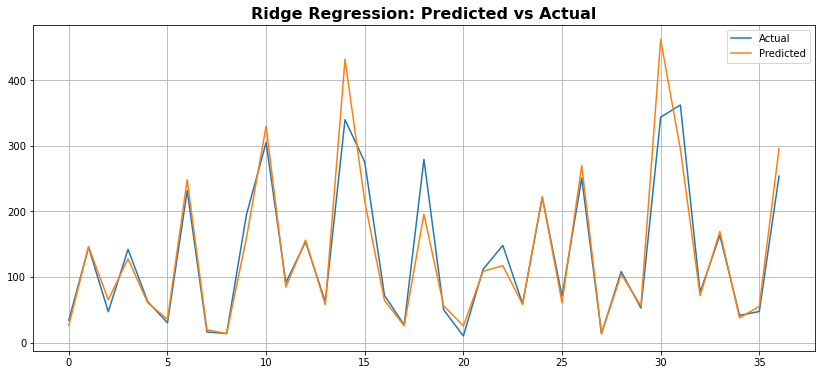

In [78]:
# plot
plt.figure(figsize=(14,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.legend(['Actual','Predicted'])
plt.title('Ridge Regression: Predicted vs Actual',fontweight = 'bold',fontsize = 16)
plt.grid()
plt.show()

In [79]:
# storing the test set metrics value in a dataframe for later comparison

dict1={'Model':'Ridge regression',
       'MAE':round((MAE),4),
       'MSE':round((MSE),4),
       'RMSE':round((RMSE),4),
       'R2_score':round((R2),4),
       'Adj_R2':round((Adj_R2),4),
       'Training_Score':round((Ridge_Regression_score),4)
       }
test_data=test_data.append(dict1,ignore_index=True)

# ELASTICNET REGRESSION

In [80]:
#fitting data on elasticnet Regression
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [81]:
#checking thhe score of model
Elastic_Regression_score = elasticnet.score(X_train, y_train)
print(Elastic_Regression_score)

0.8231252192733154


In [82]:
print(elasticnet.intercept_)
print(elasticnet.coef_)

1.799864714136271
[ 0.29330971 -0.02336358 -0.03014442 -0.         -0.00461428 -0.
  0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.02623599]


In [83]:
# Getting the y_train and y-test value
y_elastic_train_pred=elasticnet.predict(X_train)
y_elastic_test_pred=elasticnet.predict(X_test)

In [84]:
# Evluation Matrix for Lasso Regression (Train data)
MSE = mean_squared_error(y_train, y_elastic_train_pred)
MAE = mean_absolute_error(y_train, y_elastic_train_pred)
R2 = r2_score(y_train, y_elastic_train_pred)

print('Training Errors\nMSE:', MSE , '\nMAE:' , MAE , '\nR2:',R2)

Training Errors
MSE: 0.031058093141705614 
MAE: 0.14130807076879867 
R2: 0.8231252192733154


In [85]:
# Evluation Matrix for elasticnet Regression (test data)
print("MSE :",mean_squared_error(y_test, y_elastic_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_elastic_test_pred)))
print("MAE :",mean_absolute_error(y_test, y_elastic_test_pred))
print("R2 :",r2_score(y_test, y_elastic_test_pred))
Adjusted_R2 = 1-(1-r2_score((y_test), (y_elastic_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)
print('mean absolute percentage error:',round(mean_absolute_percentage_error(y_elastic_test_pred, y_test),2))

MSE : 0.029758573133932428
RMSE : 0.1725067335901194
MAE : 0.13929819508791938
R2 : 0.8402501590023401
Adjusted R2 :  0.6973160907412761
mean absolute percentage error: 0.08


# Cross Validation for ElasticNet Regression

In [86]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,40,45,50],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 40, 45, 50],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [87]:
print("The Best fit alpha value for elastic regresion is :" ,elastic_regressor.best_params_)
print("\nBy Using ",elastic_regressor.best_params_, " Negative mean squared error is: ", elastic_regressor.best_score_)

The Best fit alpha value for elastic regresion is : {'alpha': 0.01, 'l1_ratio': 0.4}

By Using  {'alpha': 0.01, 'l1_ratio': 0.4}  Negative mean squared error is:  -0.012403026744882842


In [88]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [89]:
# Now again Evaluation Matrics for elasticnet Regression after cross validation
MSE = mean_squared_error(y_test, y_pred_elastic)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred_elastic))
MAE = mean_absolute_error(y_test, y_pred_elastic)
 
R2 = r2_score(y_test, y_pred_elastic)

Adj_R2 = 1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

Mean_absolute_percentage_error = round(mean_absolute_percentage_error(y_pred_elastic, y_test),2)


print('Testing Error\nMSE:',MSE,'\nRMSE:',RMSE,'\nMAE:',MAE,'\nR2:',R2,'\nAdj R2:',Adj_R2,'\nMean abs % error:',
      Mean_absolute_percentage_error)

Testing Error
MSE: 0.009150883609908051 
RMSE: 0.09566025094002237 
MAE: 0.06382534220447833 
R2: 0.9508762669805557 
Adj R2: 0.9069234532263161 
Mean abs % error: 0.03


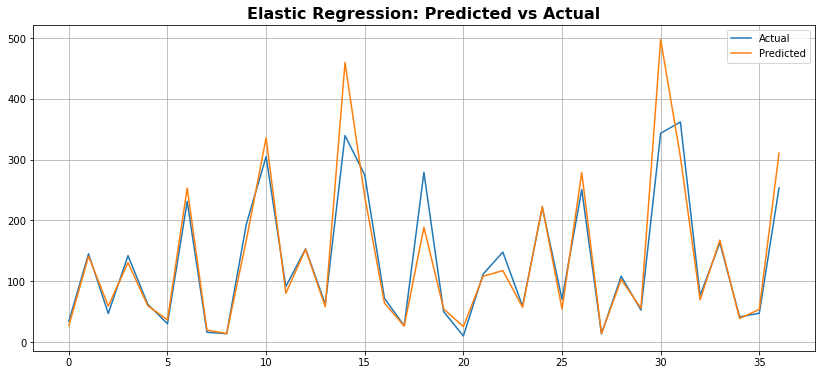

In [90]:
# plot
plt.figure(figsize=(14,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.legend(['Actual','Predicted'])
plt.title('Elastic Regression: Predicted vs Actual',fontweight = 'bold',fontsize = 16)
plt.grid()
plt.show()

In [91]:
# storing the test set metrics value in a dataframe for later comparison

dict1={'Model':'Elastic regression',
       'MAE':round((MAE),4),
       'MSE':round((MSE),4),
       'RMSE':round((RMSE),4),
       'R2_score':round((R2),4),
       'Adj_R2':round((Adj_R2),4),
       'Training_Score':round((Elastic_Regression_score),4)
       }
test_data=test_data.append(dict1,ignore_index=True)

In [92]:
test_data

,Model,MAE,MSE,RMSE,R2_score,Adj_R2,Training_Score
0,Linear regression,0.0648,0.0094,0.0970,0.9495,0.9043,0.9458
1,Lasso regression,0.0640,0.0094,0.0967,0.9498,0.9048,0.9458
2,Ridge regression,0.0621,0.0088,0.0941,0.9525,0.9100,0.9458
3,Elastic regression,0.0638,0.0092,0.0957,0.9509,0.9069,0.8231


# Comparison among all Model predictions in one graph

<AxesSubplot:xlabel='Model'>

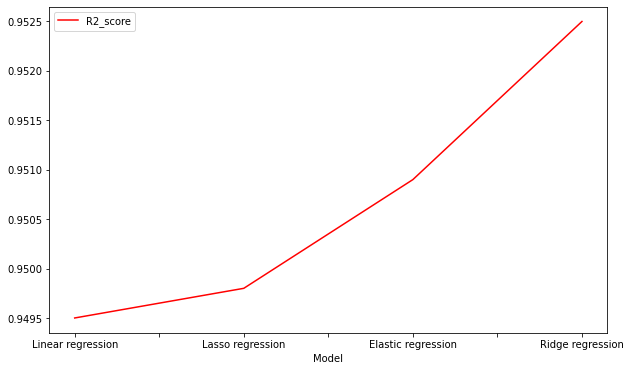

In [93]:
Final_graph= test_data[['Model','R2_score']]
Final_graph= Final_graph.sort_values(by='R2_score', ascending=True)
Final_graph.plot(x="Model", y="R2_score",color ='r' ,kind="line", figsize=(10, 6))

Here we can see that Ridge Regression is giving the highest R2 score of on the Test dataset. Therefore we can say that Ridge regression is giving us optimal results in terms of the test dataset and is best for final prediction.

# Conclusion

#### 1)first We started with data inspection, viewed the data distribution
#### 2)in visualization we checked that from 2018 onwards there is a sudden fall in the stock closing price.
#### 3)And Again With the help of a distribution plot we saw that our data is rightly skewed which doesn’t look good in the viewing of the statistical hypothesis. So we applied some kind of transformation  Log Transformation to convert it into a normal distribution.
#### 4)Target Variable is strongly dependent on Independent Variables.
#### 5)we have performed VIF to reduce multicollinearity
#### 6)Insights of all the models, A simple linear regression model was built and it was evaluated using accuracy, MSE, RMSE, r2_score, and Adj_R2, mean absolute percentage error.
#### 7)Linear Regression, Lasso and Ridge are performing better than Elasticnet models with training accuracy of 94.58%, 94.58%, and 94.58%  respectively.
#### 8)Apart from Linear Regression, Lasso, and  Ridge, ElasticNet is also performing better but has less training accuracy.
#### 9)Ridge and ElasticNet have performed far much better after Cross-validation which is R2 is about 95.25% and 95.09% respectively.
#### 10)R2 and Adjusted R2 are around the range 95% and 91% in each model.